In [1]:
import pickle

from keyrover.color import NamedPalette
from keyrover import *

In [2]:
dataset = "v4"

with open(f"{dataset}/median_texcoords.bin", "rb") as file:
    texcoords = pickle.load(file)
    
texcoords[0]

{'lalt': (42.0, 28.0),
 'space': (93.0, 29.0),
 'ralt': (140.0, 29.0),
 'fn': (158.0, 28.0),
 'menu': (176.0, 28.0),
 'rctrl': (194.0, 28.0),
 'left': (216.0, 28.0),
 'X': (48.0, 67.0),
 'C': (62.0, 68.0),
 'down': (229.0, 28.0),
 'V': (75.0, 68.0),
 'right': (242.0, 29.0),
 'B': (89.0, 68.0),
 'N': (103.0, 68.0),
 'M': (117.0, 68.0),
 '<': (131.0, 68.0),
 '>': (145.0, 67.0),
 '?': (158.0, 68.0),
 'S': (41.0, 109.0),
 'rshift': (184.0, 69.0),
 'D': (54.0, 110.0),
 'up': (229.0, 68.0),
 'F': (68.0, 109.0),
 'G': (82.0, 109.0),
 'H': (96.0, 110.0),
 'J': (110.0, 110.0),
 'K': (124.0, 109.0),
 'L': (138.0, 110.0),
 ';': (152.0, 109.0),
 'W': (37.0, 150.0),
 '"': (165.0, 109.0),
 'E': (51.0, 150.0),
 'R': (65.0, 150.0),
 'enter': (188.0, 109.0),
 'T': (79.0, 151.0),
 'Y': (92.0, 150.0),
 'U': (106.0, 150.0),
 'I': (120.0, 150.0),
 'O': (134.0, 150.0),
 '3': (46.0, 189.0),
 'P': (148.0, 150.0),
 '[': (162.0, 150.0),
 '4': (60.0, 189.0),
 ']': (176.0, 150.0),
 '5': (73.0, 189.0),
 '|': (193.

In [3]:
dataset = "v4-nodistort"

In [4]:
u_all = []
v_all = []

uv_by_class = {}

for texcoord in texcoords:
    u, v = np.array(tuple(texcoord.values())).T
    
    u_all += list(u)
    v_all += list(v)
    
    for cls, uv in texcoord.items():
        if cls not in uv_by_class:
            uv_by_class[cls] = []
            
        uv_by_class[cls].append(uv)

for cls, uvs in uv_by_class.items():
    uv_by_class[cls] = np.mean(uvs, axis=0)

with open(f"{dataset}/key_texcoords.bin", "wb") as file:
    pickle.dump(uv_by_class, file)

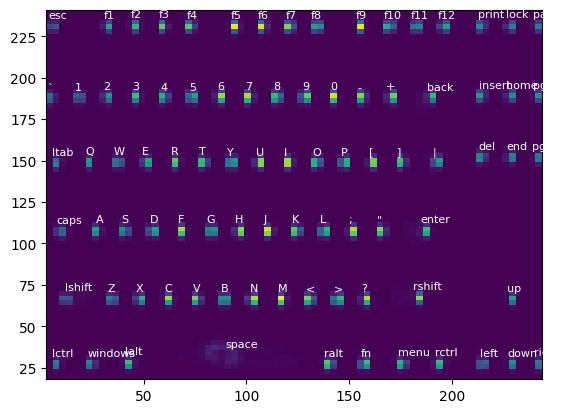

In [5]:
ax = plt.gca()
ax.hist2d(u_all, v_all, bins=75)

for cls, (u, v) in uv_by_class.items():
    ax.text(u - 2, v + 5, cls, c="white", fontsize=8)

plt.show()

In [6]:
colors = []
classes = []

for cls, (u, v) in uv_by_class.items():
    colors.append((u, v))
    classes.append(cls)

palette = NamedPalette(colors, classes)

with open(f"{dataset}/texcoords_palette.bin", "wb") as file:
    pickle.dump(palette, file)
    
palette.colors

array([[ 43,  27],
       [ 91,  32],
       [139,  27],
       [157,  27],
       [175,  27],
       [193,  27],
       [215,  27],
       [ 48,  66],
       [ 62,  66],
       [228,  27],
       [ 75,  66],
       [241,  27],
       [ 89,  66],
       [103,  66],
       [117,  66],
       [130,  66],
       [144,  66],
       [158,  66],
       [ 41, 107],
       [183,  67],
       [ 54, 107],
       [229,  66],
       [ 68, 107],
       [ 82, 107],
       [ 96, 107],
       [110, 107],
       [124, 107],
       [137, 107],
       [151, 107],
       [ 37, 148],
       [165, 107],
       [ 51, 148],
       [ 65, 148],
       [186, 107],
       [ 78, 148],
       [ 92, 148],
       [106, 148],
       [120, 148],
       [134, 148],
       [ 46, 187],
       [147, 148],
       [161, 148],
       [ 60, 187],
       [175, 148],
       [ 73, 187],
       [192, 148],
       [ 87, 187],
       [228, 151],
       [214, 151],
       [241, 151],
       [101, 187],
       [115, 187],
       [128,